In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema

# Initializing parameters
Bi = 1
n = [200, 200, 200, 200, 200]
kappa = [1, 1, 1, 1, 1]
length = [1, 1, 1, 1, np.sqrt(2)]

n_total = np.sum(n)
omega = np.logspace(-2, 4)
deltax = np.zeros(len(n))
D = np.zeros(len(n))
lamb = np.zeros(len(n), dtype=complex)

# Defining indices for last pore inner value
inner = []
accumulator = 0
for value in n:
    accumulator = accumulator + value
    inner.append(accumulator - 1)

# Defining indices for pore ends
end = np.arange(n_total + 1, n_total + 2 * len(n), 2)

for i in range(len(n)):
    deltax[i] = length[i] / (n[i] + 2)
    D[i] = kappa[i] / np.tanh(kappa[i])

# Initializing solutions
Z_num = np.array([])
Z_ana = np.array([])

for w in omega:
    step = 0
    # Initializing A array
    A = np.zeros((n_total + 2 * len(n), n_total + 2 * len(n)), dtype = complex)

    # Initializing b vector
    b = np.zeros((n_total + 2 * len(n)), dtype = complex)

    for i in range(len(n)):
        # Creating unique lambda for each pore and omega
        lamb[i] = 1j * w * deltax[i] ** 2 / D[i]
        
        for j in range(step, n[i] + step):
            # Create A array
            if j == 0:
                A[j, end[0] - 1] = 1
                A[j, j] = -(2 + lamb[i])
                A[j, j + 1] = 1
            elif j in inner:
                index = np.where(inner == j)[0]
                A[j, j - 1] = 1
                A[j, j] = -(2 + lamb[i])
                A[j, end[index]] = 1
            elif (j - 1) in inner:
                index = np.where(inner == (j - 1))[0]
                A[j, end[index + 1]] = 1
                A[j, j] = -(2 + lamb[i])
                A[j, j + 1] = 1
            else:
                A[j, j - 1] = 1
                A[j, j] = -(2 + lamb[i])
                A[j, j + 1] = 1
         
            # Creating b vector
            b[j] = -lamb[i]
            
        step = n[i] + step

    ### Junction 13
    ## Current from resevoir into pore 1 and 3
    # Inlet of pore 1
    A[n_total, end[0] - 1] = -3 * kappa[0] / 2 / deltax[0] - Bi
    A[n_total, 0] = 2 * kappa[0] / deltax[0]
    A[n_total, 1] = -1 * kappa[0] / 2 / deltax[0]
    
    # Inlet of pore 3
    A[n_total, end[2] - 1] = -3 * kappa[2] / 2 / deltax[2]
    A[n_total, inner[1] + 1] = 2 * kappa[2] / deltax[2]
    A[n_total, inner[1] + 2] = -1 * kappa[2] / 2 / deltax[2]
    
    # Potential match pore 1 and 3
    A[n_total + 1, end[0] - 1] = 1
    A[n_total + 1, end[2] - 1] = -1
    
    ### Junction 125
    ## Current from pore 1 into pore 2 and 5
    # Inlet pore 1
    A[n_total + 2, end[0]] = 3 * kappa[0] / 2 / deltax[0]
    A[n_total + 2, inner[0]] = -2 * kappa[0] / deltax[0]
    A[n_total + 2, inner[0] - 1] = kappa[0] / 2 / deltax[0]
    
    # Inlet pore 2
    A[n_total + 2, end[1] - 1] = 3 * kappa[1] / 2 / deltax[1]
    A[n_total + 2, inner[0] + 1] = -2 * kappa[1] / deltax[1]
    A[n_total + 2, inner[0] + 2] = kappa[1] / 2 / deltax[1]
    
    # Inlet pore 5
    A[n_total + 2, end[4] - 1] = 3 * kappa[4] / 2 / deltax[4]
    A[n_total + 2, inner[3] + 1] = -2 * kappa[4] / deltax[4]
    A[n_total + 2, inner[3] + 2] = kappa[4] / 2 / deltax[4]

    # Potential match pore 1 and 2
    A[n_total + 3, end[0]] = 1
    A[n_total + 3, end[1] - 1] = -1
                                                      
    # Potential match pore 1 and 5
    A[n_total + 4, end[0]] = 1
    A[n_total + 4, end[4] - 1] = -1
    
    ### Junction 345
    ## Current from pore 3 and 5 into pore 4
    # Oulet pore 3
    A[n_total + 5, end[2]] = 3 * kappa[2] / 2 / deltax[2]
    A[n_total + 5, inner[2]] = -2 * kappa[2] / deltax[2]
    A[n_total + 5, inner[2] - 1] = kappa[2] / 2 / deltax[2]
    
    # Outlet pore 5
    A[n_total + 5, end[4]] = 3 * kappa[4] / 2 / deltax[4]
    A[n_total + 5, inner[4]] = -2 * kappa[4] / deltax[4]
    A[n_total + 5, inner[4] - 1] = kappa[4] / 2 / deltax[4]
    
    # Inlet pore 4
    A[n_total + 5, end[3] - 1] = 3 * kappa[3] / 2 / deltax[3]
    A[n_total + 5, inner[2] + 1] = -2 * kappa[3] / deltax[3]
    A[n_total + 5, inner[2] + 2] = kappa[3] / 2 / deltax[3]
      
    # Potential match pore 3 and 4
    A[n_total + 6, end[2]] = 1
    A[n_total + 6, end[3] - 1] = -1

    # Potential match pore 3 and 5
    A[n_total + 7, end[2]] = 1
    A[n_total + 7, end[4]] = -1

    ### Junction 24
    ## Current from pore 2 and 4 into supercapacitor
    # Outlet pore 2
    A[n_total + 8, end[1]] = 3 * kappa[1] / 2 / deltax[1]
    A[n_total + 8, inner[1]] = -2 * kappa[1] / deltax[1]
    A[n_total + 8, inner[1] - 1] = kappa[1] / 2 / deltax[1]

    # Outlet pore 4
    A[n_total + 8, end[3]] = 3 * kappa[3] / 2 / deltax[3]
    A[n_total + 8, inner[3]] = -2 * kappa[3] / deltax[3]
    A[n_total + 8, inner[3] - 1] = kappa[3] / 2 / deltax[3]
      
    # Potential match pore 2 and 4
    A[n_total + 9, end[1]] = 1
    A[n_total + 9, end[3]] = -1

    # Solve system of linear equations
    y = np.linalg.solve(A, b)

    # Numerical impedance solution
    Z_num = np.append(Z_num, 1 / y[end[0] - 1] / Bi)
    
    # # Analytical impedance solutions
    # z1_trans = (np.tanh(length[0] * (1j * w / D[0]) ** 0.5)) / (1j * w / D[0]) ** 0.5
    # z2_trans = (np.tanh(length[1] * (1j * w / D[1]) ** 0.5)) / (1j * w / D[1]) ** 0.5
    # z3_trans = (np.tanh(length[2] * (1j * w / D[2]) ** 0.5)) / (1j * w / D[2]) ** 0.5
    # z4_trans = (np.tanh(length[3] * (1j * w / D[3]) ** 0.5)) / (1j * w / D[3]) ** 0.5
    # z5_trans = (np.tanh(length[4] * (1j * w / D[4]) ** 0.5)) / (1j * w / D[4]) ** 0.5
    # z1_ref = (np.tanh(length[0] * (1j * w / D[0]) ** 0.5)) ** (-1) / (1j * w / D[0]) ** 0.5
    # z2_ref = (np.tanh(length[1] * (1j * w / D[1]) ** 0.5)) ** (-1) / (1j * w / D[1]) ** 0.5
    # z3_ref = (np.tanh(length[2] * (1j * w / D[2]) ** 0.5)) ** (-1) / (1j * w / D[2]) ** 0.5
    # z4_ref = (np.tanh(length[3] * (1j * w / D[3]) ** 0.5)) ** (-1) / (1j * w / D[3]) ** 0.5
    # z5_ref = (np.tanh(length[4] * (1j * w / D[4]) ** 0.5)) ** (-1) / (1j * w / D[4]) ** 0.5
    # Z_ana = np.append(Z_ana, 1 / Bi + z1_trans + z3_trans + z5_trans + z2_ref + z4_ref)

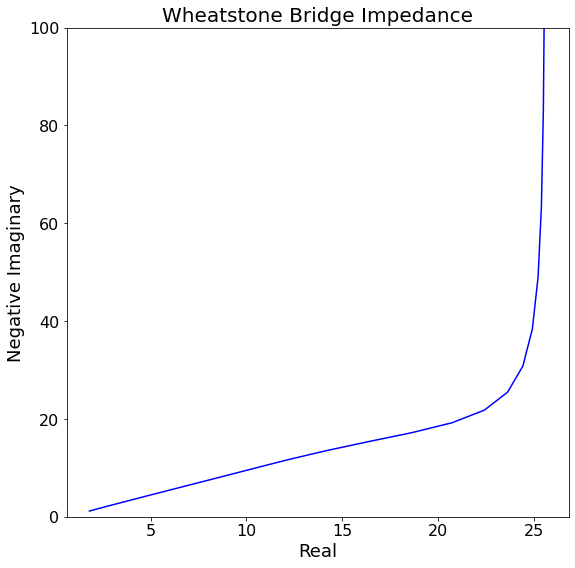

In [35]:
# Set figure size
plt.figure(figsize=(9, 9))
plt.plot(Z_num.real, -Z_num.imag, label = 'Numerical', color='blue')
# plt.plot(Z_ana.real, -Z_ana.imag, label = 'Analytical')

# Figure formatting
plt.title('Wheatstone Bridge Impedance', fontsize=20)
plt.xlabel('Real', fontsize=18)
plt.ylabel('Negative Imaginary', fontsize=18)
plt.ylim([0, 100])
plt.tick_params(axis='both', which='major', labelsize=16)
# plt.legend()

# Show the plots
plt.show()